# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrRu-2019-08-30.zip
unzip autoriaNumberplateOcrRu-2019-08-30.zip
mv autoriaNumberplateOcrRu-2019-08-30 ru
```
or use your own dataset.

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [3]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "ru"
VERSION = "2020_10_07_tensorflow_v2.3"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [4]:
class ru(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "K", "M", "O", "P", "T", "X", "Y"]
        
        self.EPOCHS = 2

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'M', 'P', '1', 'E', 'C', '3', '0', 'B', 'Y', '5', '2', 'K', '8', '9', 'O', 'H', 'X', 'T', '6', '4', '7', 'A'}
Letters val  {'M', 'P', '1', 'E', 'C', '3', '0', 'B', 'Y', '5', '2', 'K', '8', '9', 'H', 'O', 'X', '6', 'T', '4', '7', 'A'}
Letters test  {'M', 'P', '1', 'E', 'C', '3', '0', 'B', 'Y', '5', '2', 'K', '8', '9', 'H', 'O', 'X', '6', 'T', '4', '7', 'A'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


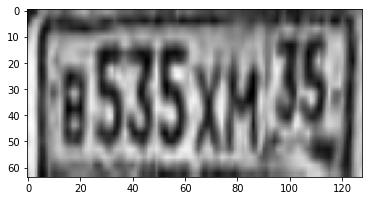

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED


In [5]:
ocrTextDetector = ru()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False)

In [25]:
model = ocrTextDetector.train()


START TRAINING
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
____________________________________________________________________________

In [26]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 O536O43
True: 			 O536OO43

Predicted: 		 A32TT152
True: 			 A302TT152

Predicted: 		 H055X29
True: 			 H056HX29

Predicted: 		 Y013YY6
True: 			 Y013YY26

Predicted: 		 K770KY3
True: 			 K770KY33

Predicted: 		 M648AB29
True: 			 H648AB29

Predicted: 		 P37XX98
True: 			 P337XX98

Predicted: 		 B639MX116
True: 			 B639MY116

Predicted: 		 A003PX46
True: 			 K003PX46

Predicted: 		 X498OB3
True: 			 X498OB33

Predicted: 		 K552Y54
True: 			 K552YE54

Predicted: 		 X193BH17
True: 			 X193BH197

Predicted: 		 A050MM43
True: 			 K050MM43

Predicted: 		 H120HH3
True: 			 H120HH39

Predicted: 		 K707KP59
True: 			 K707KP58

Predicted: 		 X055HO9
True: 			 X055HO69

Predicted: 		 542PK52
True: 			 Y542PK52

Predicted: 		 X303PK002
True: 			 X303PK02
Test processing time: 0.8513257503509521 seconds
acc: 0.9633401221995926


In [27]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_07_tensorflow_v2.3.h5


In [28]:
# Train with aug

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'M', 'P', '1', 'E', 'C', '3', '0', 'B', 'Y', '5', '2', 'K', '8', '9', 'O', 'H', 'X', 'T', '6', '4', '7', 'A'}
Letters val  {'M', 'P', '1', 'E', 'C', '3', '0', 'B', 'Y', '5', '2', 'K', '8', '9', 'H', 'O', 'X', '6', 'T', '4', '7', 'A'}
Letters test  {'M', 'P', '1', 'E', 'C', '3', '0', 'B', 'Y', '5', '2', 'K', '8', '9', 'H', 'O', 'X', '6', 'T', '4', '7', 'A'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


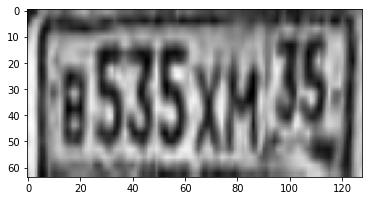

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_____________________________

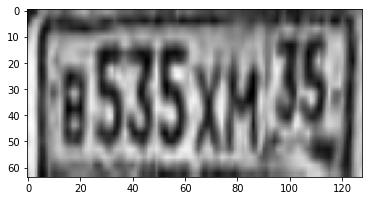

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_____________________________

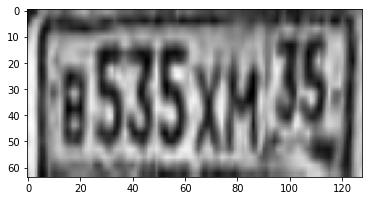

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_____________________________

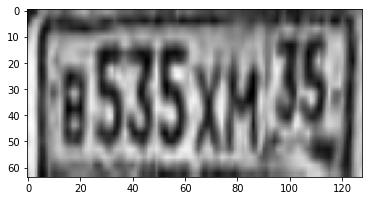

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________

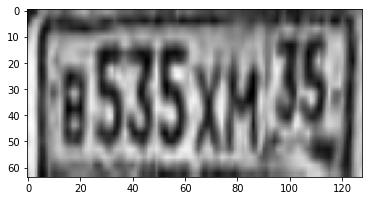

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________

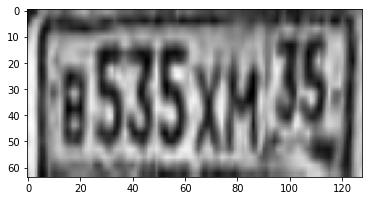

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________

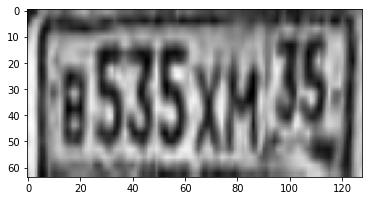

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________

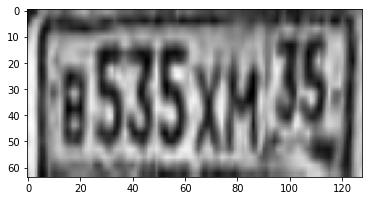

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________

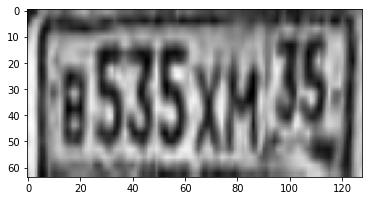

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________

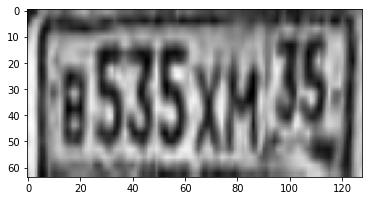

2) the_labels (plate number): B535XM35 is encoded as [11, 5, 3, 5, 20, 16, 3, 5, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_37"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________

In [7]:
for i in range(10):
    ocrTextDetector = ru()
    ocrTextDetector.EPOCHS = 2

    model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

    model = ocrTextDetector.train(load_last_weights=True,is_random=1)
    ocrTextDetector.test(verbose=True)

In [8]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 Y013YY6
True: 			 Y013YY26

Predicted: 		 K707KPC59
True: 			 K707KP58

Predicted: 		 542PK52
True: 			 Y542PK52
Test processing time: 0.19321012496948242 seconds
acc: 0.9938900203665988


In [9]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_07_tensorflow_v2.3.h5


In [6]:
ocrTextDetector.load(RESULT_MODEL_PATH, verbose=False)

In [9]:
ocrTextDetector.load('/home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_07_tensorflow_v2.3.h5', verbose=True)

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
____________________________________________________________________________________________

In [8]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
converter = trt.TrtGraphConverterV2(input_saved_model_dir=RESULT_MODEL_PATH)
converter.convert()
converter.save(output_saved_model_dir)

INFO:tensorflow:Linked TensorRT version: (7, 2, 0)
INFO:tensorflow:Loaded TensorRT version: (7, 2, 0)


OSError: SavedModel file does not exist at: /home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_07_tensorflow_v2.3.h5/{saved_model.pbtxt|saved_model.pb}

In [8]:
converter.convert()

OSError: SavedModel file does not exist at: /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_08_tensorflow_v2.2.h5/{saved_model.pbtxt|saved_model.pb}

In [9]:
from NomeroffNet.Base import convert_keras_to_freeze_pb

ImportError: cannot import name 'convert_keras_to_freeze_pb'

In [13]:
RESULT_MODEL_PATH1 = '/var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2'
RESULT_MODEL_PATH_TRT = '/var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2_trt'

In [12]:
#ocrTextDetector.save(RESULT_MODEL_PATH1, verbose=True)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2/assets
SAVED TO /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2


In [14]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
converter = trt.TrtGraphConverterV2(input_saved_model_dir=RESULT_MODEL_PATH1)
converter.convert()
converter.save(RESULT_MODEL_PATH_TRT)

INFO:tensorflow:Linked TensorRT version: (7, 1, 3)
INFO:tensorflow:Loaded TensorRT version: (7, 1, 3)
INFO:tensorflow:Could not find TRTEngineOp_0_0 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_1 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_4 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_3 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_5 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngi